In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"IMDb Movies India.csv", encoding='latin1')
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
# Data Cleaning

df.dropna(subset=['Rating'], inplace=True)
df.drop_duplicates(subset=['Name', 'Year'], keep='first', inplace=True)

df.dropna(subset=df.columns[[1, 2, 4, 5]], how='all', inplace=True)
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)
df['Duration'] = df['Duration'].str.replace(r' min', '', regex=True)

In [4]:
# Display the cleaned dataset shape
print(f"Cleaned dataset shape: {df.shape}")

Cleaned dataset shape: (7916, 10)


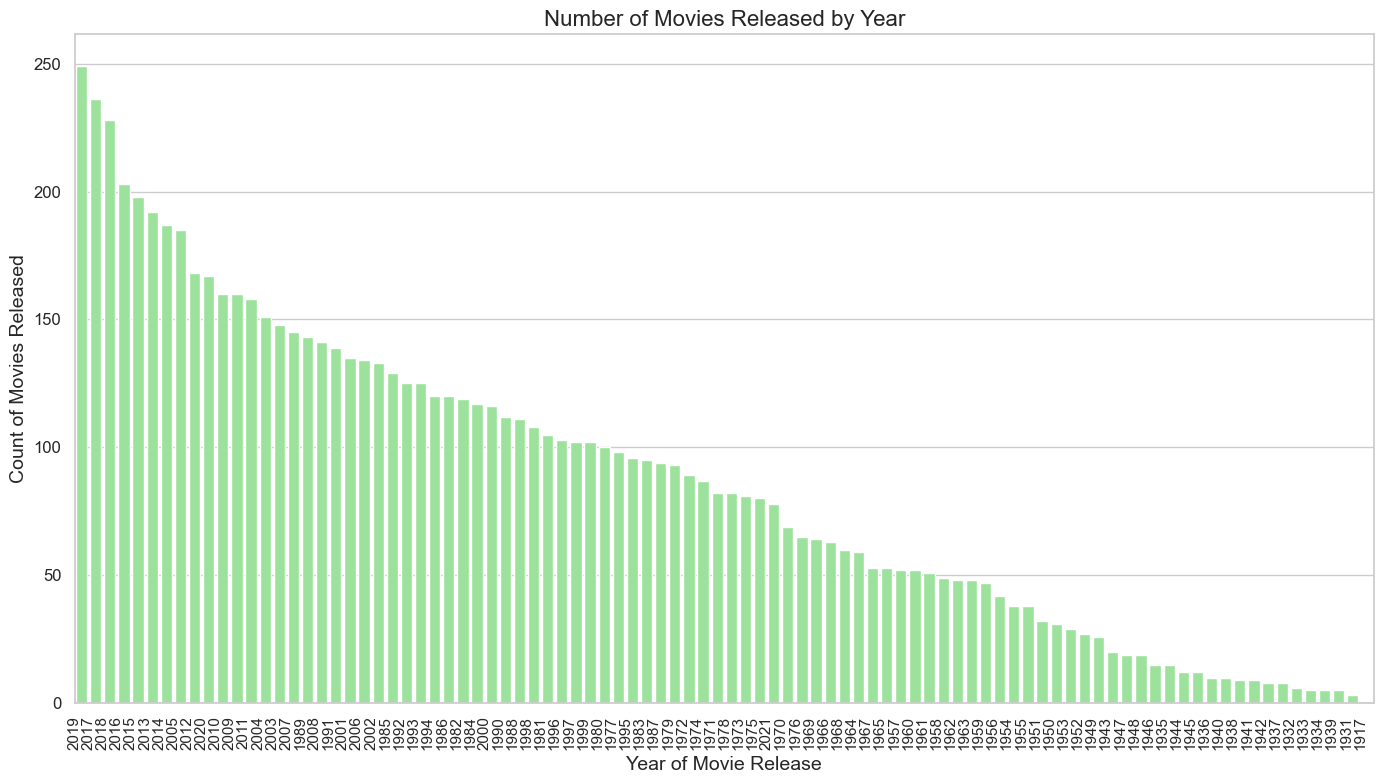

In [5]:
# Movies released by year

year_count = df['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'Count']
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='Count', data=year_count, color="lightgreen")
plt.title('Number of Movies Released by Year', fontsize=16)
plt.xlabel('Year of Movie Release', fontsize=14)
plt.ylabel('Count of Movies Released', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=11)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


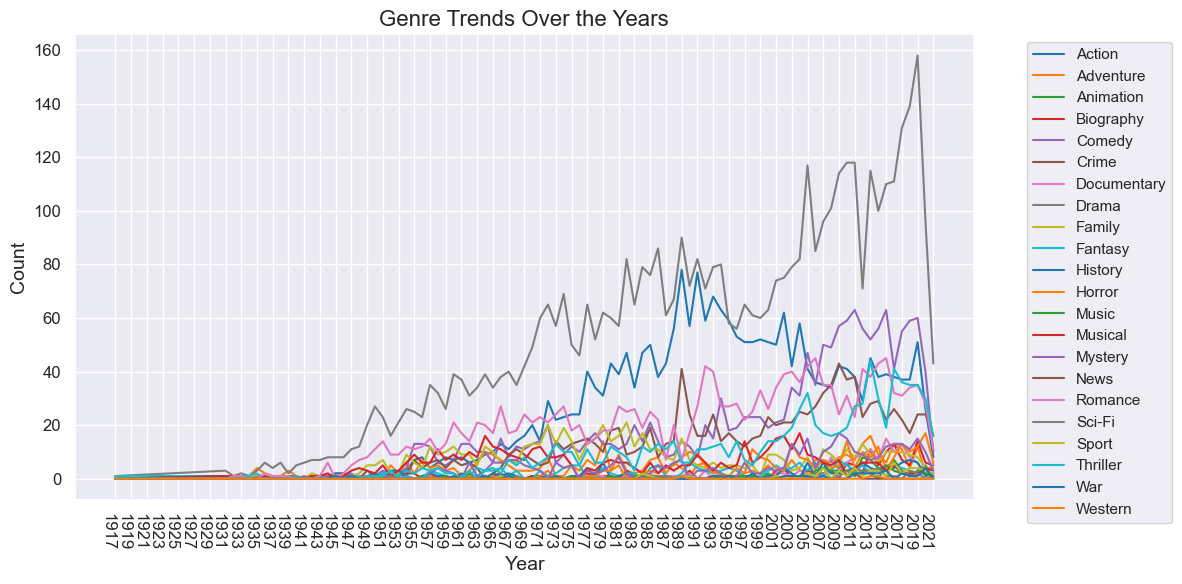

In [6]:
# Genre Trends

dummy = df['Genre'].str.get_dummies(', ')
df_genre = pd.concat([df, dummy], axis=1)
genre_columns = df_genre.columns[10:]
genre_count_by_year = df_genre.groupby('Year')[genre_columns].sum().reset_index()
genre_count_by_year['Year'] = genre_count_by_year['Year'].astype(int)
plt.figure(figsize=(12, 6))
palette = sns.color_palette("tab10", n_colors=len(genre_columns))
sns.set_style("darkgrid")

for genre, color in zip(genre_columns, palette):
    sns.lineplot(x='Year', y=genre, data=genre_count_by_year, label=genre, color=color)
plt.title('Genre Trends Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(min(genre_count_by_year['Year']), max(genre_count_by_year['Year']) + 1, 2), rotation=270, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


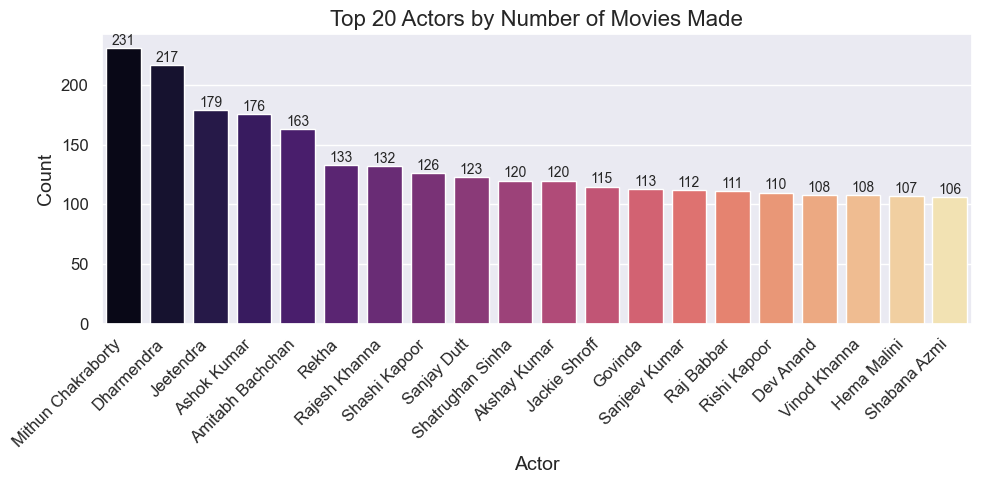

In [7]:
# Top Actors

Actor1 = df[['Actor 1', 'Year']].rename(columns={'Actor 1': 'Actor'}, inplace=False)
Actor2 = df[['Actor 2', 'Year']].rename(columns={'Actor 2': 'Actor'}, inplace=False)
Actor3 = df[['Actor 3', 'Year']].rename(columns={'Actor 3': 'Actor'}, inplace=False)
Actor_Year = pd.concat([Actor1, Actor2, Actor3], ignore_index=True).dropna()
Actor_Year['Count'] = 1
Actor_Top = Actor_Year['Actor'].value_counts().rename_axis('Actor').reset_index(name='Count')
top_20_actors = Actor_Top.head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x='Actor', y='Count', data=top_20_actors, hue='Actor', dodge=False, palette='magma', legend=False)
for index, value in enumerate(top_20_actors['Count']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)
plt.title('Top 20 Actors by Number of Movies Made', fontsize=16)
plt.xlabel('Actor', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

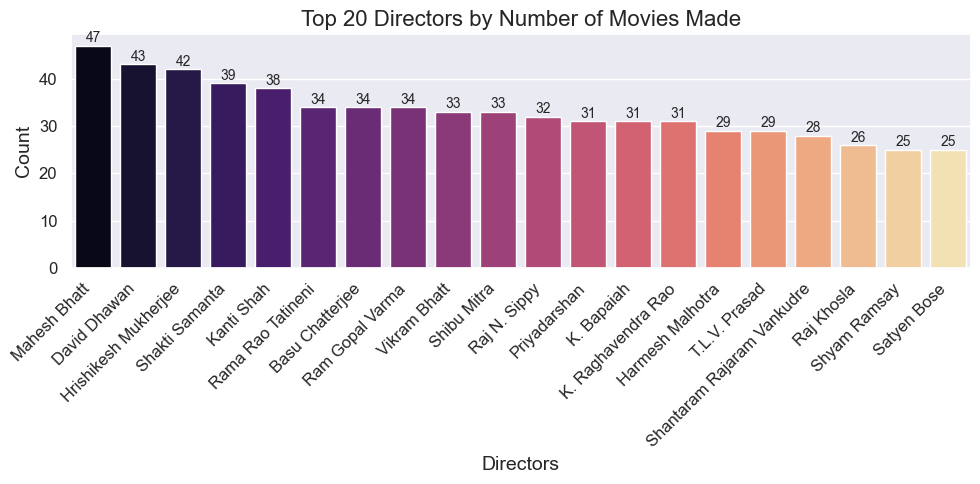

In [8]:
# Top Directors

Director_Year = df[['Director', 'Year']].dropna()
Director_Year['Count'] = 1
Director_Top = Director_Year['Director'].value_counts().rename_axis('Director').reset_index(name='Count')
top_20_directors = Director_Top.head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x='Director', y='Count', data=top_20_directors, hue='Director', dodge=False, palette='magma', legend=False)

for index, value in enumerate(top_20_directors['Count']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)
plt.title('Top 20 Directors by Number of Movies Made', fontsize=16)
plt.xlabel('Directors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Linear regression Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
features = df[['Genre', 'Director', 'Name']]
target = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

categorical_features = ['Genre', 'Director', 'Name']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


model = LinearRegression()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [11]:
acc = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {acc}')

Mean Squared Error: 2.5647978257396153


#### Sample

In [12]:
new_data = pd.DataFrame({
    'Genre': ['Drama'],
    'Director': ['Mahesh Bhatt'],
    'Name': ['Arth']
})
predicted_rating = pipeline.predict(new_data)
print(f'Predicted Rating for the New Movie: {predicted_rating[0]}')

Predicted Rating for the New Movie: 9.799893997718254
